# Limpieza de datos

In [ ]:
import pandas as pd
import numpy as np

coffe = pd.read_csv('/content/drive/MyDrive/Datos Cafetería/Coffe_sales.csv')
coffe.head(10)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000


In [ ]:
# Eliminar columnas redundantes

coffe = coffe.drop(columns=['Time', 'Weekdaysort', 'Monthsort'])


In [ ]:
#Impresión sin las columnas redundantes

coffe.head(10)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Date
0,10,card,38.7,Latte,Morning,Fri,Mar,2024-03-01
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01
3,13,card,28.9,Americano,Afternoon,Fri,Mar,2024-03-01
4,13,card,38.7,Latte,Afternoon,Fri,Mar,2024-03-01
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,2024-03-01
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,2024-03-01
8,19,card,38.7,Cocoa,Night,Fri,Mar,2024-03-01
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,2024-03-01


In [ ]:
coffe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Date         3547 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 221.8+ KB


In [ ]:
coffe.describe()

,hour_of_day,money
count,3547.000000,3547.000000
mean,14.185791,31.645216
std,4.234010,4.877754
min,6.000000,18.120000
25%,10.000000,27.920000
50%,14.000000,32.820000
75%,18.000000,35.760000
max,22.000000,38.700000


In [ ]:
coffe.columns = [col.strip().lower().replace(' ', '_') for col in coffe.columns]

In [ ]:
coffe.describe()

,hour_of_day,money
count,3547.000000,3547.000000
mean,14.185791,31.645216
std,4.234010,4.877754
min,6.000000,18.120000
25%,10.000000,27.920000
50%,14.000000,32.820000
75%,18.000000,35.760000
max,22.000000,38.700000


In [ ]:
#Eliminar valores nulos
coffe = coffe.dropna()

In [ ]:
#Eliminar duplicados
coffe = coffe.drop_duplicates()

In [ ]:
#1.	¿Cuál es el café más vendido por número de transacciones?

top_coffe = coffe['coffee_name'].value_counts().idxmax()
top_count = coffe['coffee_name'].value_counts().max()

print(f"El café más vendido es {top_coffe} con {top_count} transacciones.")
#
print(top_coffe)
#

El café más vendido es Americano with Milk con 671 transacciones.
Americano with Milk


In [ ]:
# 2.	¿Qué cafés generan más ingresos (y cuál tiene mayor ticket promedio)?

ingresos_por_cafe = coffe.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print("Cafés con más ingresos:")
print(ingresos_por_cafe)

#Ticket promedio

ticket_promedio = coffe.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
print("\nCafés con mayor ticket promedio:")
print(ticket_promedio)

cafe_mayor_ticket = ticket_promedio.idxmax()
mayor_ticket_valor = ticket_promedio.max()
print("\nEl café con el mayor ticket promedio es:", cafe_mayor_ticket, "con un valor de", mayor_ticket_valor)
#

Cafés con más ingresos:
coffee_name
Latte                  22316.16
Americano with Milk    20562.02
Cappuccino             14730.68
Americano              11420.44
Hot Chocolate           8106.76
Cocoa                   6962.42
Cortado                 6334.72
Espresso                2484.58
Name: money, dtype: float64

Cafés con mayor ticket promedio:
coffee_name
Hot Chocolate          36.030044
Cappuccino             35.841071
Cocoa                  35.704718
Latte                  35.535287
Americano with Milk    30.643845
Americano              25.955545
Cortado                25.856000
Espresso               20.878824
Name: money, dtype: float64

El café con el mayor ticket promedio es: Hot Chocolate con un valor de 36.03004444444444


In [ ]:
resultados = pd.DataFrame({
    'Ingresos totales': ingresos_por_cafe,
    'Ticket promedio': ticket_promedio
})
print(resultados)

                     Ingresos totales  Ticket promedio
coffee_name                                           
Americano                    11420.44        25.955545
Americano with Milk          20562.02        30.643845
Cappuccino                   14730.68        35.841071
Cocoa                         6962.42        35.704718
Cortado                       6334.72        25.856000
Espresso                      2484.58        20.878824
Hot Chocolate                 8106.76        36.030044
Latte                        22316.16        35.535287


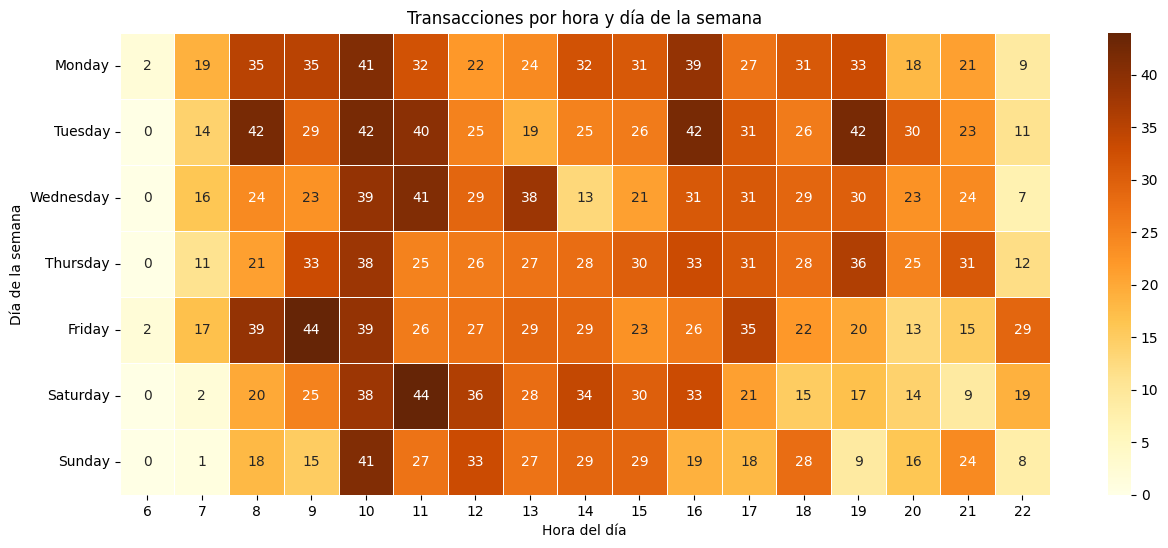

In [ ]:
# 3.	¿Cuáles son las horas pico por día de la semana? (heatmap hora × día)

coffe['date'] = pd.to_datetime(coffe['date'])
coffe['hour'] = coffe['date'].dt.hour
coffe['day_of_week'] = coffe['date'].dt.day_name()
tabla_pico = coffe.groupby(['day_of_week', 'hour_of_day']).size().unstack(fill_value=0)

dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tabla_pico = tabla_pico.reindex(dias_orden)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.heatmap(tabla_pico, cmap="YlOrBr", linewidths=.5, annot=True, fmt="d")
plt.title('Transacciones por hora y día de la semana')
plt.ylabel('Día de la semana')
plt.xlabel('Hora del día')
plt.show()


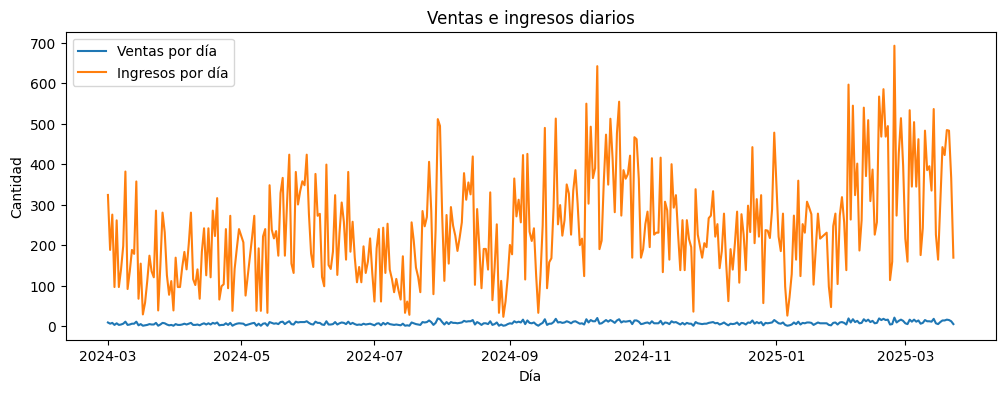

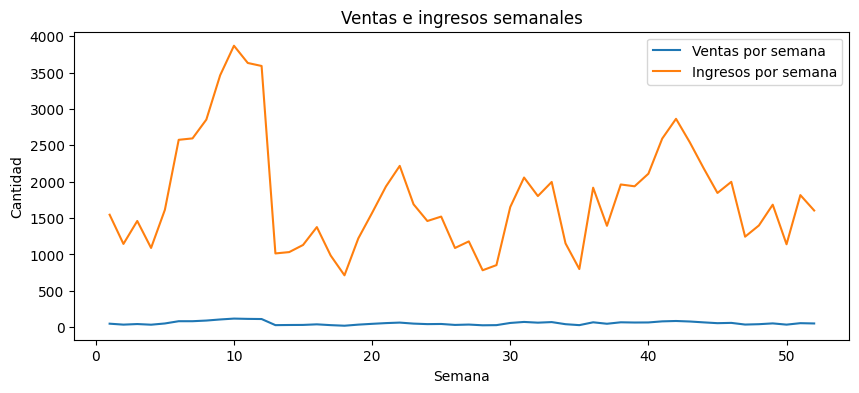

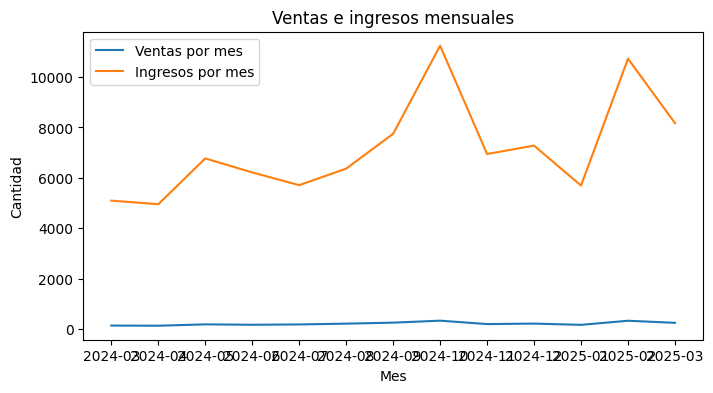

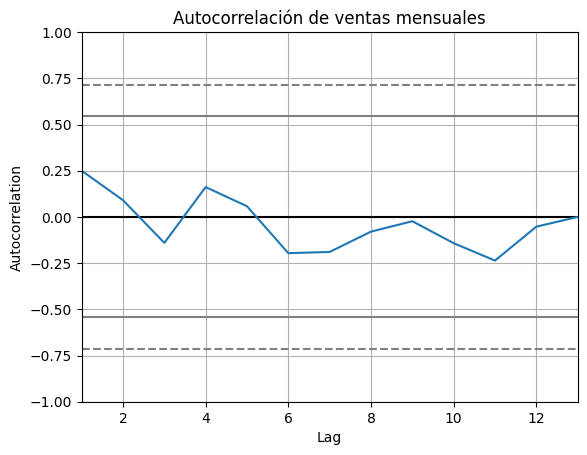

In [ ]:
#4.	¿Cómo evolucionan ventas/ingresos por día, semana y mes? ¿Hay estacionalidad?

coffe['date'] = pd.to_datetime(coffe['date'])

coffe['day'] = coffe['date'].dt.date
coffe['week'] = coffe['date'].dt.isocalendar().week
coffe['month'] = coffe['date'].dt.to_period('M')

#Ventas e ingresos por periodo

ventas_por_dia = coffe.groupby('day').size()
ingresos_por_dia = coffe.groupby('day')['money'].sum()

ventas_por_semana = coffe.groupby('week').size()
ingresos_por_semana = coffe.groupby('week')['money'].sum()

ventas_por_mes = coffe.groupby('month').size()
ingresos_por_mes = coffe.groupby('month')['money'].sum()

ventas_por_mes.index = ventas_por_mes.index.astype(str)
ingresos_por_mes.index = ingresos_por_mes.index.astype(str)

#Gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(ventas_por_dia, label='Ventas por día')
plt.plot(ingresos_por_dia, label='Ingresos por día')
plt.legend()
plt.title('Ventas e ingresos diarios')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(ventas_por_semana, label='Ventas por semana')
plt.plot(ingresos_por_semana, label='Ingresos por semana')
plt.legend()
plt.title('Ventas e ingresos semanales')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(ventas_por_mes, label='Ventas por mes')
plt.plot(ingresos_por_mes, label='Ingresos por mes')
plt.legend()
plt.title('Ventas e ingresos mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.show()

#Estacionalidad

pd.plotting.autocorrelation_plot(ventas_por_mes)
plt.title('Autocorrelación de ventas mensuales')
plt.show()